[ 0.05350564  0.37509893  2.97712945]


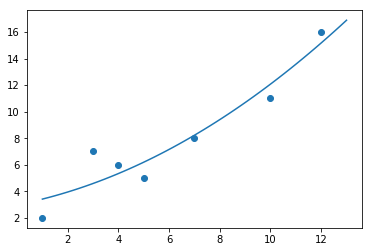

In [59]:
import numpy as np
from matplotlib import pyplot as plt

def det(A):
    row_num = len(A)
    col_num = len(A[0])
    if row_num != col_num:
        return 0
    if col_num == 1:
        return A[0][0]
    elif col_num == 2:
        return A[0][0] * A[1][1] - A[0][1] * A[1][0]
    det_value = 0
    for col in range(col_num):
        C = np.delete(np.delete(A, 0, 1), col, 0) #刪除第一行第col列
        det_value += pow(-1, 1+(col+1)) * A[0][col] * det(C)
    return det_value

def isInvertible(A):
    if(det(A) != 0):
        return True
    else:
        return False

def gauss_elimination(A):
    row_num = len(A)
    col_num = len(A[0])
    cur_row = 0
    for cur_col in range(min(row_num, col_num)):
        max_row = np.argmax(A[cur_row:, cur_col]) + cur_row
        A[[cur_row, max_row], :] = A[[max_row, cur_row], :]  # cur_row與max_row互換
        if A[cur_row][cur_col] == 0:
            continue
        A[cur_row, :] = A[cur_row, :] / [A[cur_row][cur_col]] #整列除以最前方最大數
        for remain_row in range(row_num):
            if remain_row != cur_row:
                A[remain_row, :] = A[remain_row, :] - A[remain_row, cur_col] * A[cur_row, :]
        cur_row += 1
    return A

def inverse_matrix(A):
    if isInvertible(A) == False:
        return None
    row_num = col_num = len(A) #方陣
    argumented_matrix = np.hstack((A, np.identity(row_num)))
    g_e_A = gauss_elimination(argumented_matrix)
    return g_e_A[:, col_num:]

def init_vector(v):
    for i in range(len(v)):
        v[i] = np.random.randint(1,10,[1, len(v)])
    return v

def find_orthonormal_vector(v):
    w = np.zeros((len(v), len(v)))
    w[:, 0] = v[:, 0]
    for n in range(1, len(v)):
        v_project = np.zeros((1, len(v)))
        for i in range(0, n):
            v_project += np.sum(np.multiply(v[:, n], w[:, i])) / np.sum(w[:, i] ** 2) * w[:, i]
        w[:, n] = v[:, n] - v_project
    return w

def isLinearIndepent(v):
    if len(v) != len(v[0]):
        return False
    g_e_v = gauss_elimination(v)
    if(np.array_equal(g_e_v, np.identity(len(v)))):
        return True
    else:
        return False

def data_fitting(data, P=1):
    data_x = data[:, 0]
    A = np.zeros((len(data), P + 1))
    b = data[:, 1]
    x0 = np.zeros((len(data)))
    for i in range(P + 1):
        cur_col = P - i
        A[:, cur_col] = np.power(data_x, i)
    Aadj = A.T.conjugate()
    Aadj_A = np.dot(Aadj, A)
    if not isInvertible(Aadj_A):
        print('cant invertible')
    else:
        Aadj_A_inv = inverse_matrix(Aadj_A)
        x0 =  np.dot(np.dot(Aadj_A_inv, Aadj), b)
    return x0

def draw_picture(data, P):
    data_x = data[:, 0]
    coefficient = data_fitting(data, P)
    print(coefficient)
    x = np.linspace(min(data_x), max(data_x)+1)    
    y = 0    
    for i in range(P+1):
        y =  y + pow(x, P-i) * coefficient[i]

    plt.figure()
    plt.scatter(data[:,0], data[:,1])
    plt.plot(x, y)
    plt.show()

    
A = np.array(([1,2,3],
             [4,20,14],
             [7,8,11]))

v = np.array([[1,0,0,10],[9,5,0,8] ,[1,0,1,4],[0,2,3,4]], dtype=float).T
find_orthonormal_vector(v)
data = np.array([(1, 2), (3, 7), (4, 6), (5, 5), (7, 8), (10, 11),(12, 16)])
draw_picture(data, 2)